1. Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it's possible you may find a solution with more than 3 clusters that nevertheless better tracks the real, trinary outcome – two of those clusters may map to a single flower type while the other two map to the other types for example.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [10]:
# Defining the k-means
kmeans_cluster_3 = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster_3.fit(X_std)
y_pred = kmeans_cluster_3.predict(X_std)

13.3 ms ± 204 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


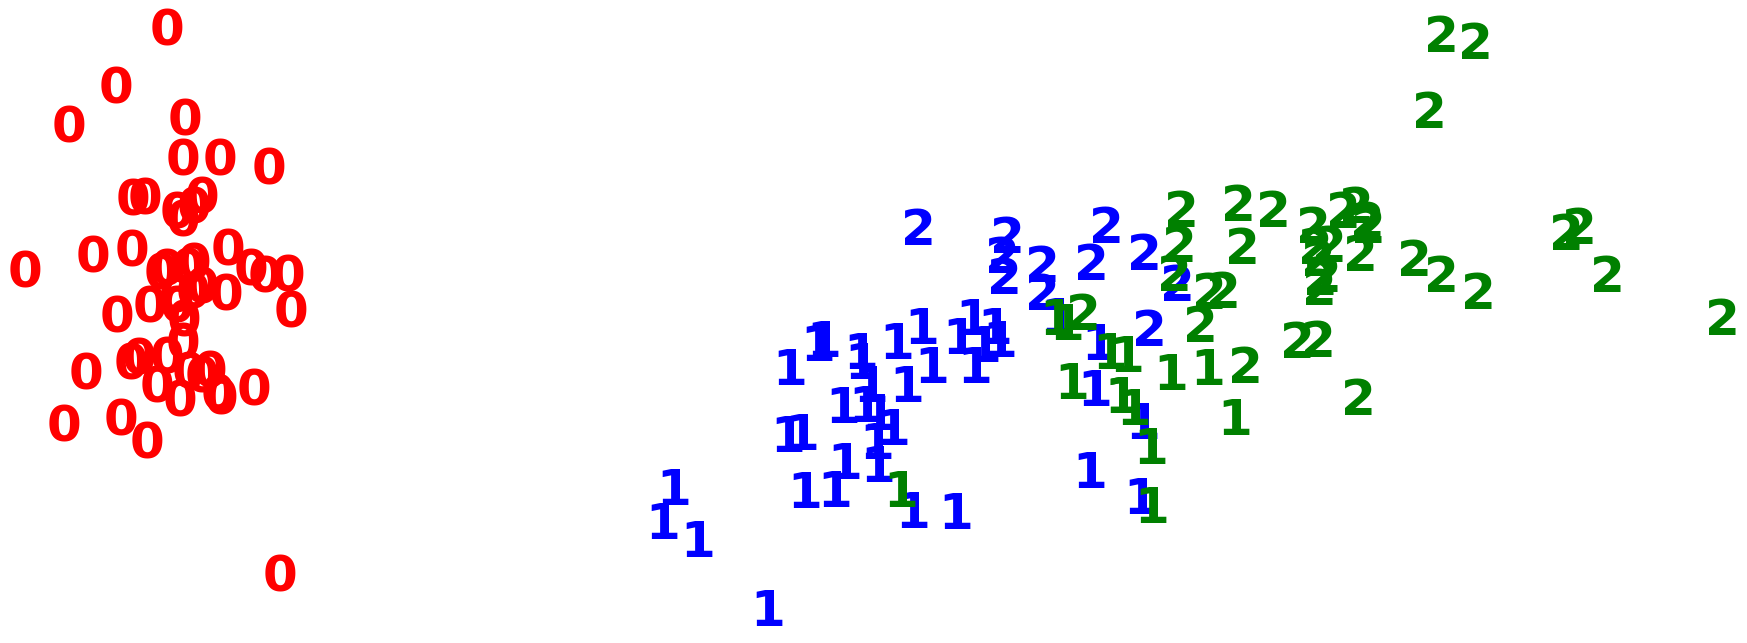

In [13]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(5,2))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

19.9 ms ± 84.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


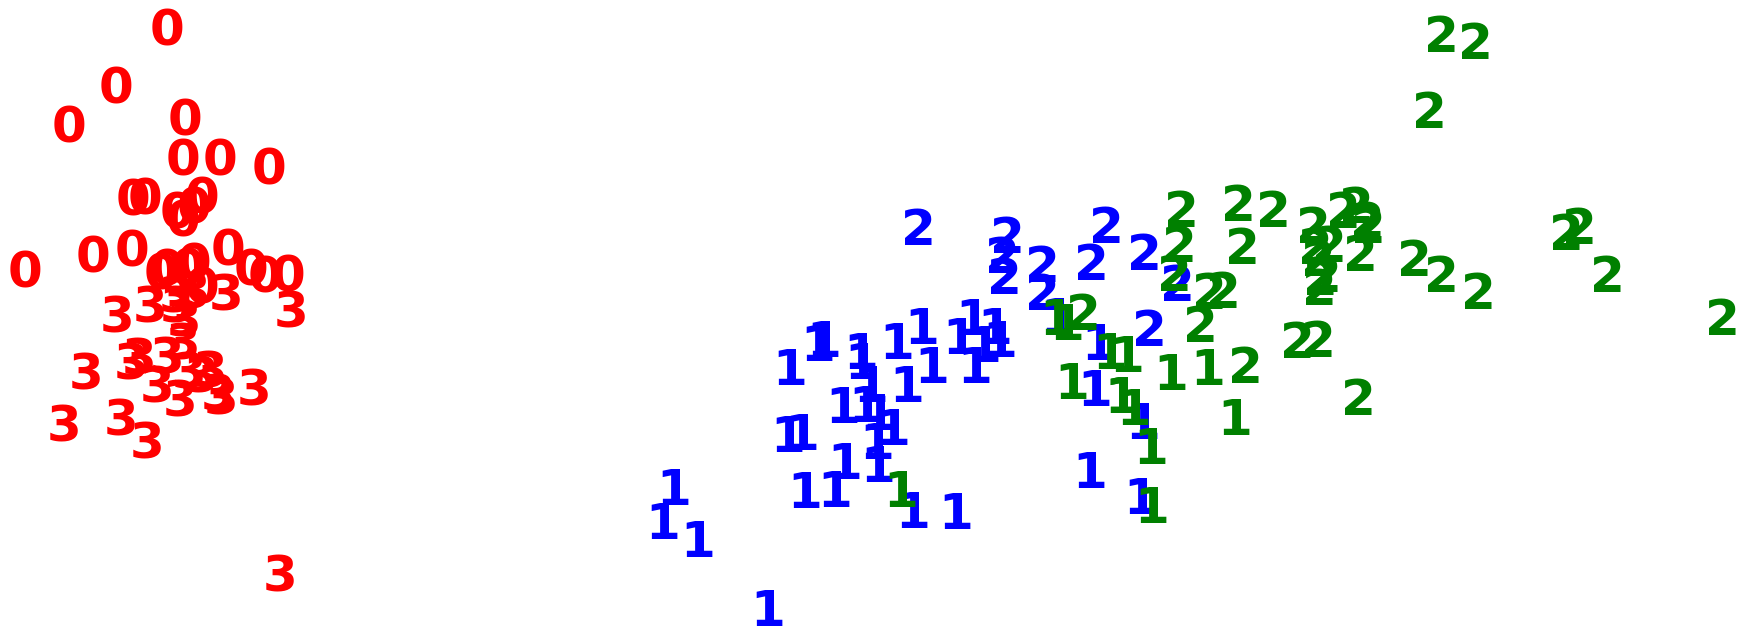

In [14]:
# Defining the k-means
kmeans_cluster_4 = KMeans(n_clusters=4, random_state=123)

# Fit model
%timeit kmeans_cluster_4.fit(X_std)
y_pred = kmeans_cluster_4.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(5,2))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The overlap between the blue and green clusters is exactly the same with four clusters as three, so I don't feel that anything was gained by using four clusters.

23.1 ms ± 171 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


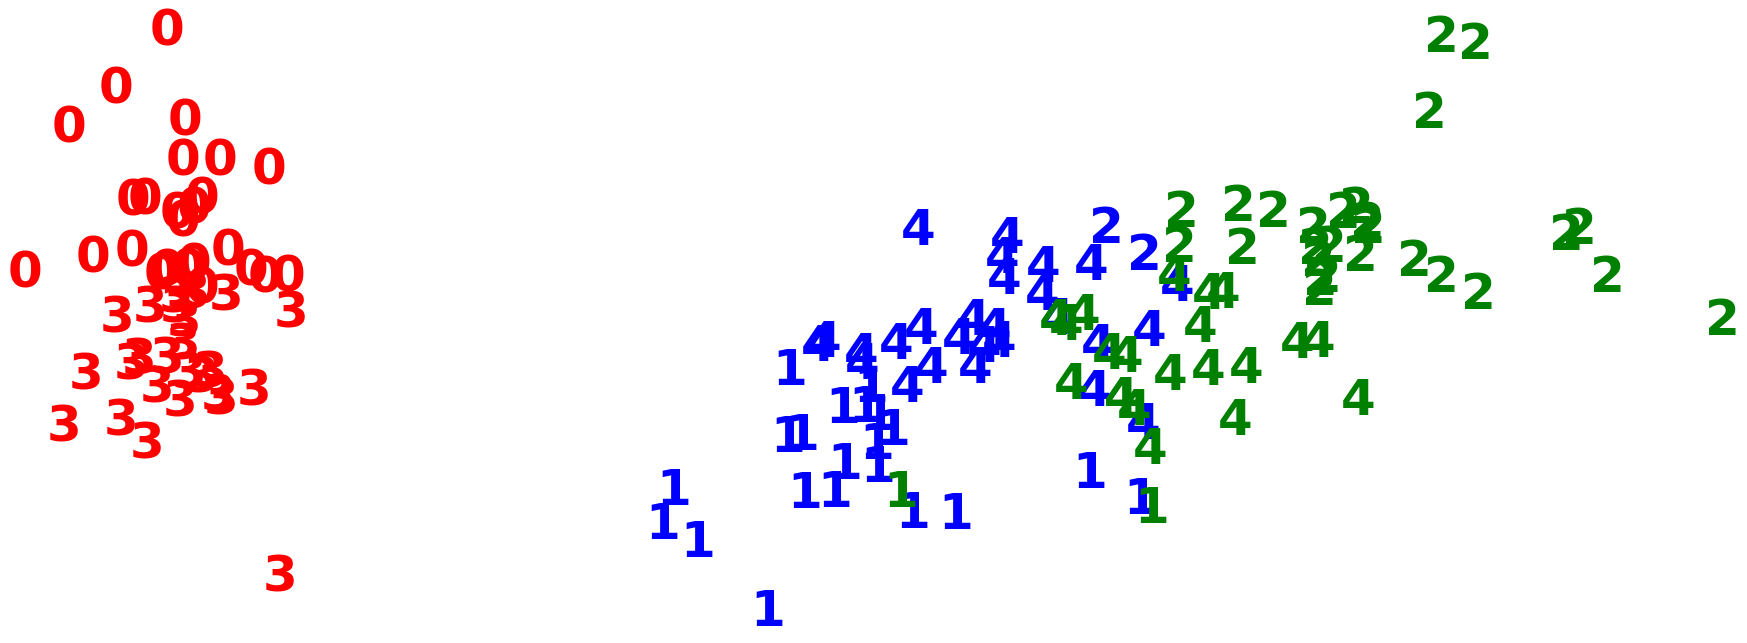

In [15]:
# Defining the k-means
kmeans_cluster_5 = KMeans(n_clusters=5, random_state=123)

# Fit model
%timeit kmeans_cluster_5.fit(X_std)
y_pred = kmeans_cluster_5.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(5,2))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The overlap between the blue and green groups is slightly better (by one) with five clusters.

29.8 ms ± 676 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


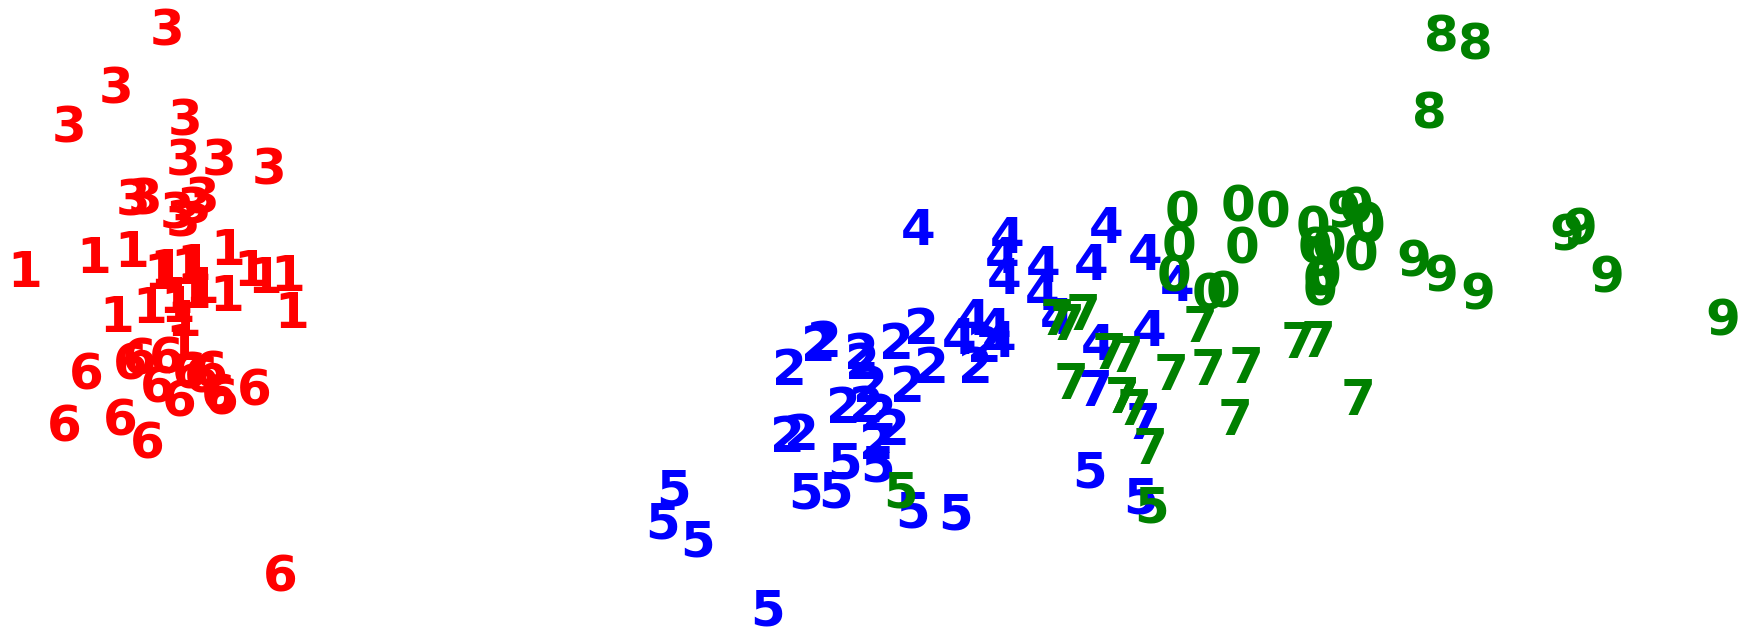

In [18]:
# Defining the k-means
kmeans_cluster_10 = KMeans(n_clusters=10, random_state=123)

# Fit model
%timeit kmeans_cluster_10.fit(X_std)
y_pred = kmeans_cluster_10.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(5,2))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

K-means seems to perform best with ten clusters. There appear to be only four data points matched incorrectly.

2.In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.

3.Load the dataset from the Thinkful's database.

In [24]:
from sqlalchemy import create_engine
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [27]:

# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Here, X will be your features and in y we hold the labels. If y is equal to 1, then it indicates that the corresponding patient has heart disease and if y is equal to 0, then the patient doesn't have heart disease.

Create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease.

Assigning k to 2 doesn't to too well with 51 incorrectly assigned data points.

20.5 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


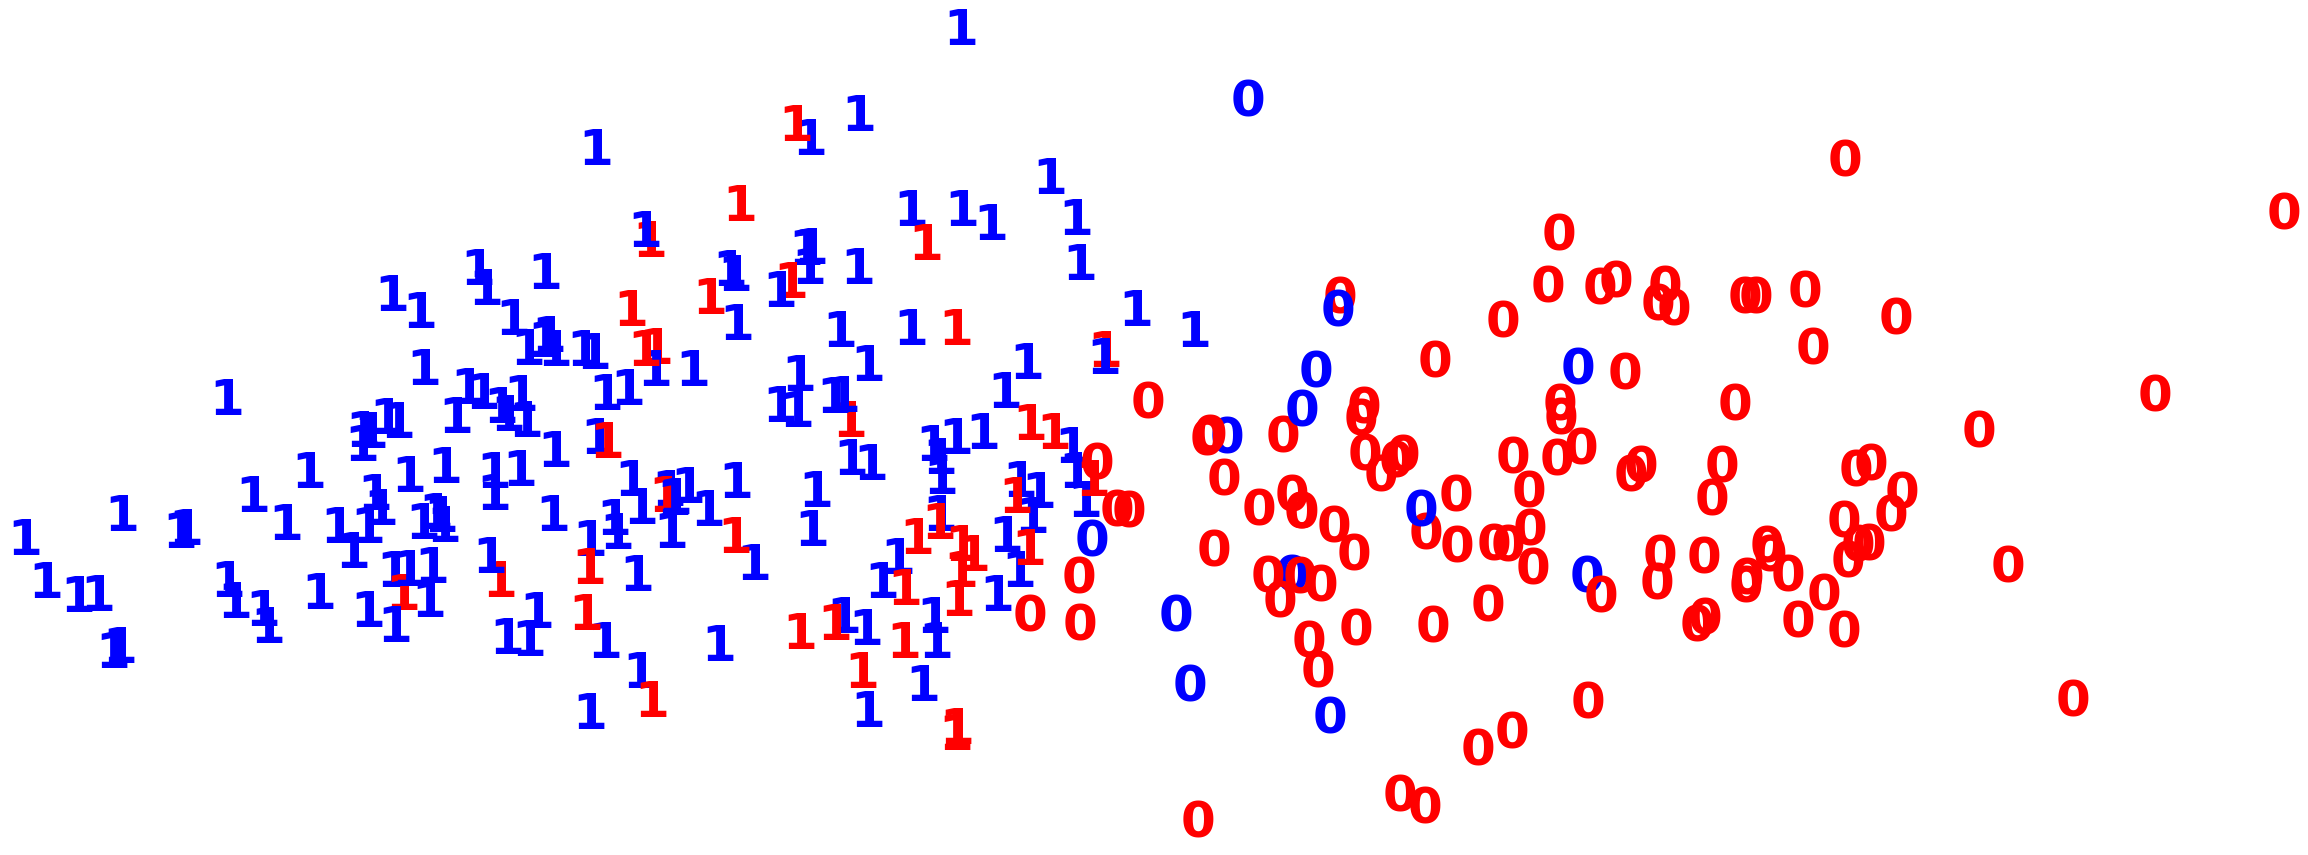

col_0    0    1
row_0          
0      101   13
1       38  151


In [53]:
# Defining the k-means
kmeans_cluster_2 = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster_2.fit(X_std)
y_pred = kmeans_cluster_2.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(5,2))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print(pd.crosstab(y_pred, y))

Using five clusters does slightly more poorly than two with 64 incorrectly assigned data points.

31.4 ms ± 550 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


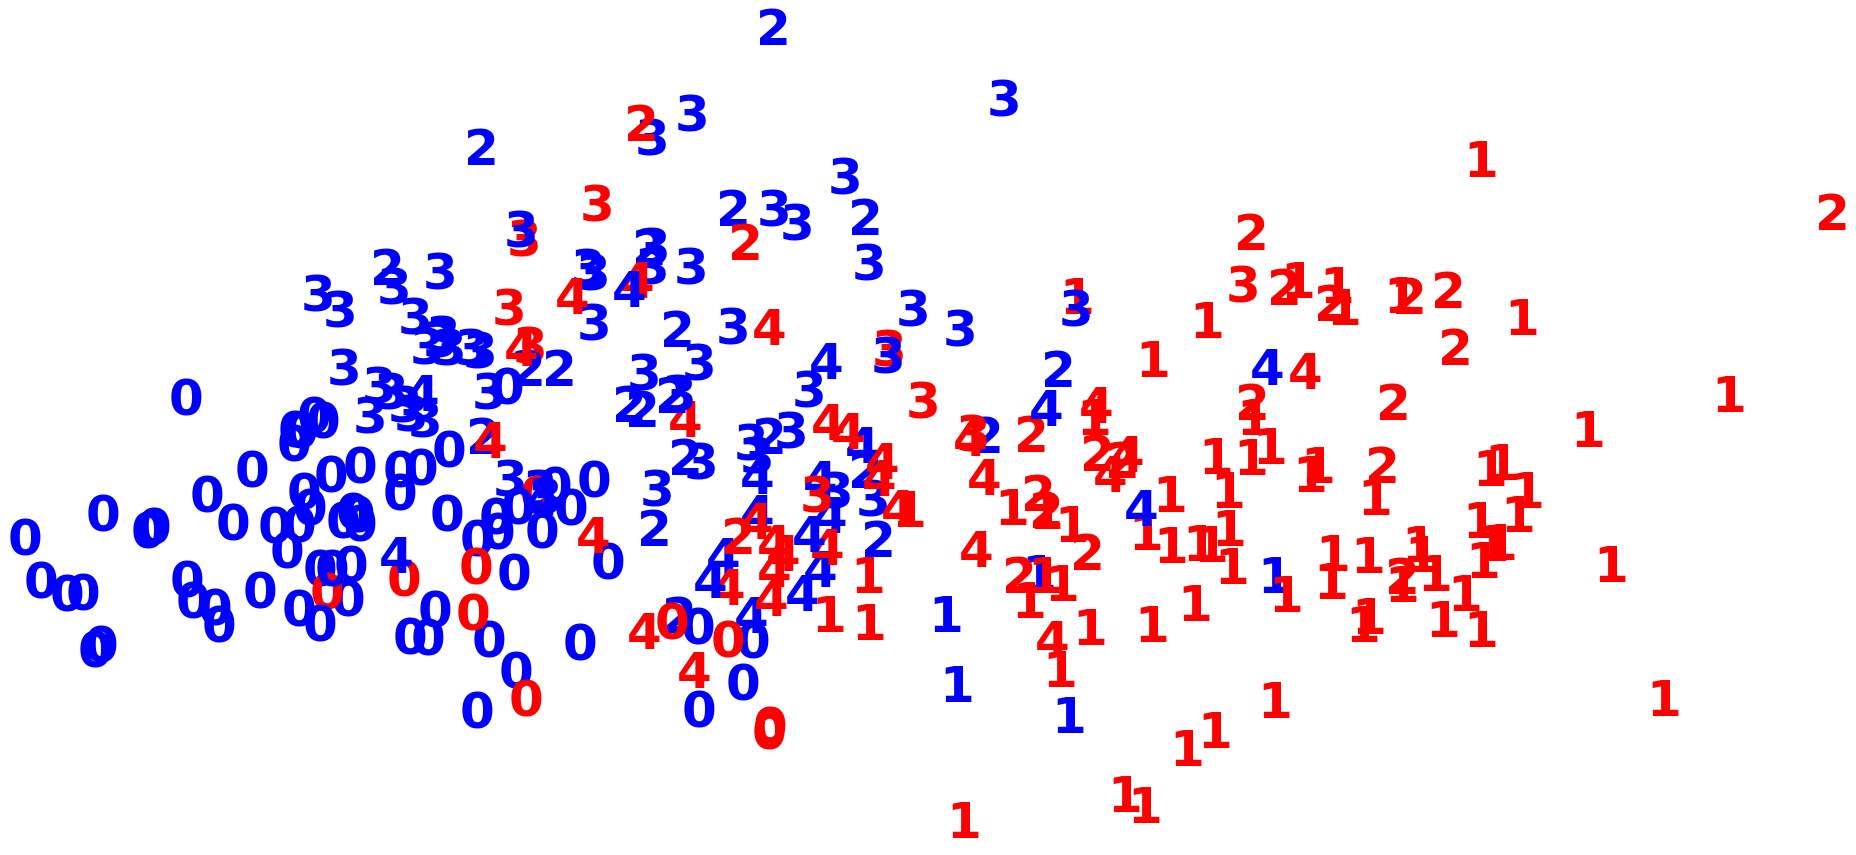

col_0   0   1
row_0        
0      10  67
1      70   5
2      21  21
3       9  52
4      29  19


In [54]:
# Defining the k-means
kmeans_cluster_5 = KMeans(n_clusters=5, random_state=123)

# Fit model
%timeit kmeans_cluster_5.fit(X_std)
y_pred = kmeans_cluster_5.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(4, 2))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print(pd.crosstab(y_pred, y))

Using a k-means of eight provides a model with 64 incorrectly assigned data points.

37.9 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


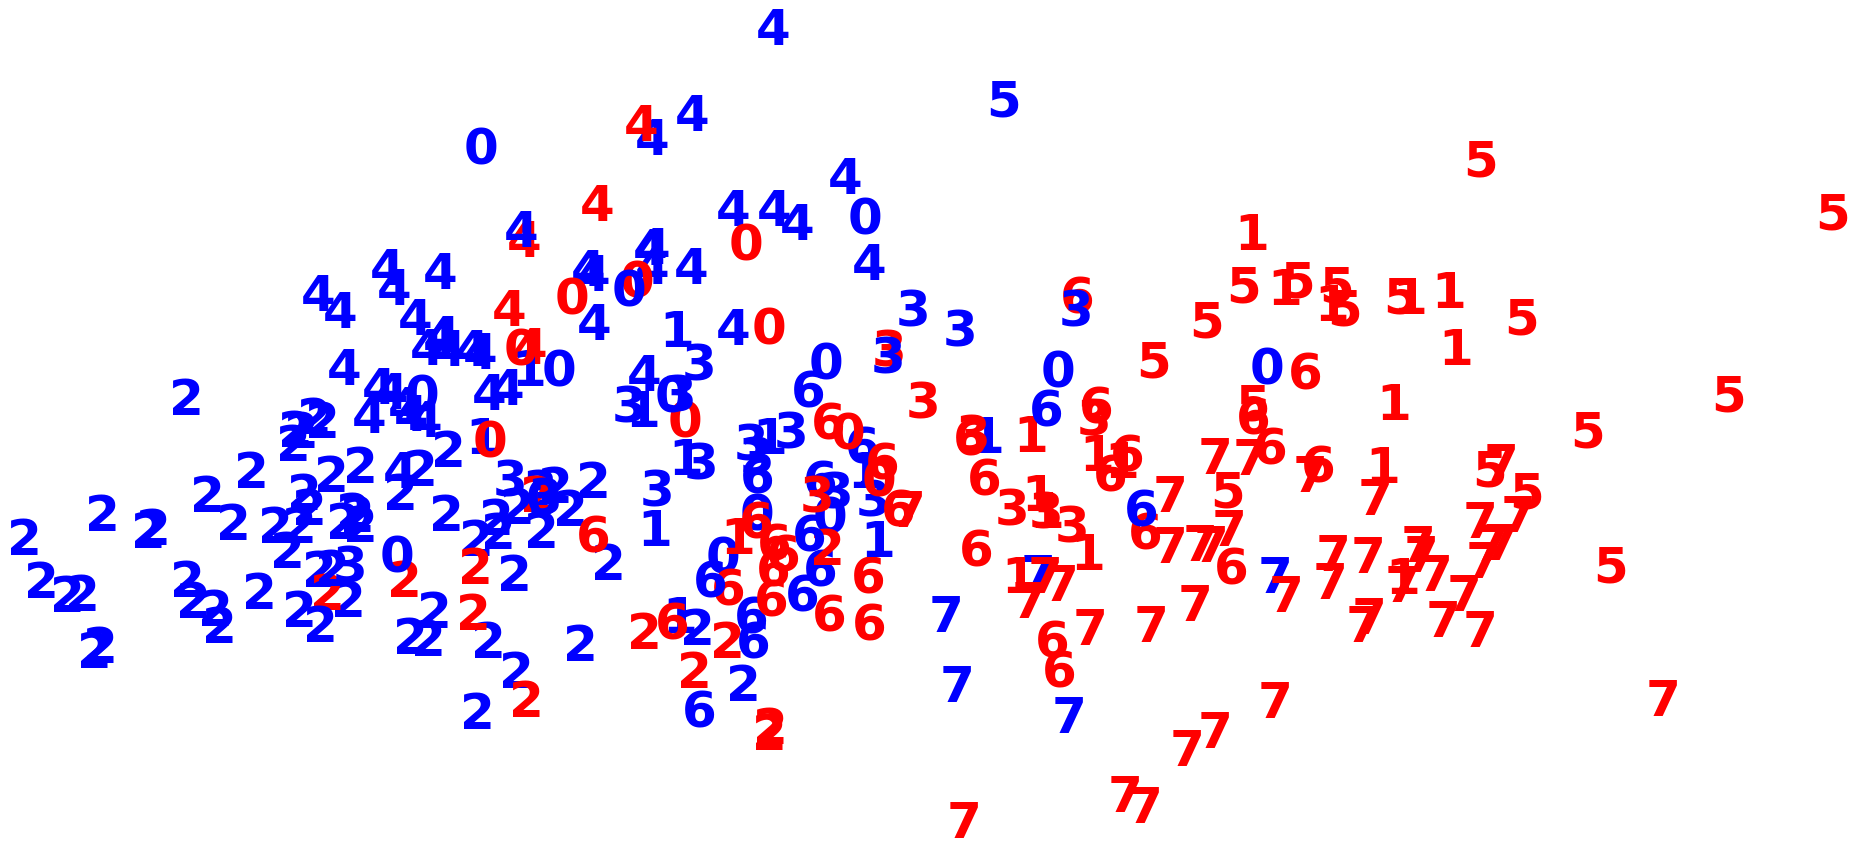

col_0   0   1
row_0        
0       9  14
1      17  11
2      12  62
3       8  18
4       5  40
5      17   1
6      29  13
7      42   5


In [55]:
# Defining the k-means
kmeans_cluster_8 = KMeans(n_clusters=8, random_state=123)

# Fit model
%timeit kmeans_cluster_8.fit(X_std)
y_pred = kmeans_cluster_8.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(4, 2))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print(pd.crosstab(y_pred, y))

Using ten clusters does a bit better with 57 incorrectly assigned data points.

47.9 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


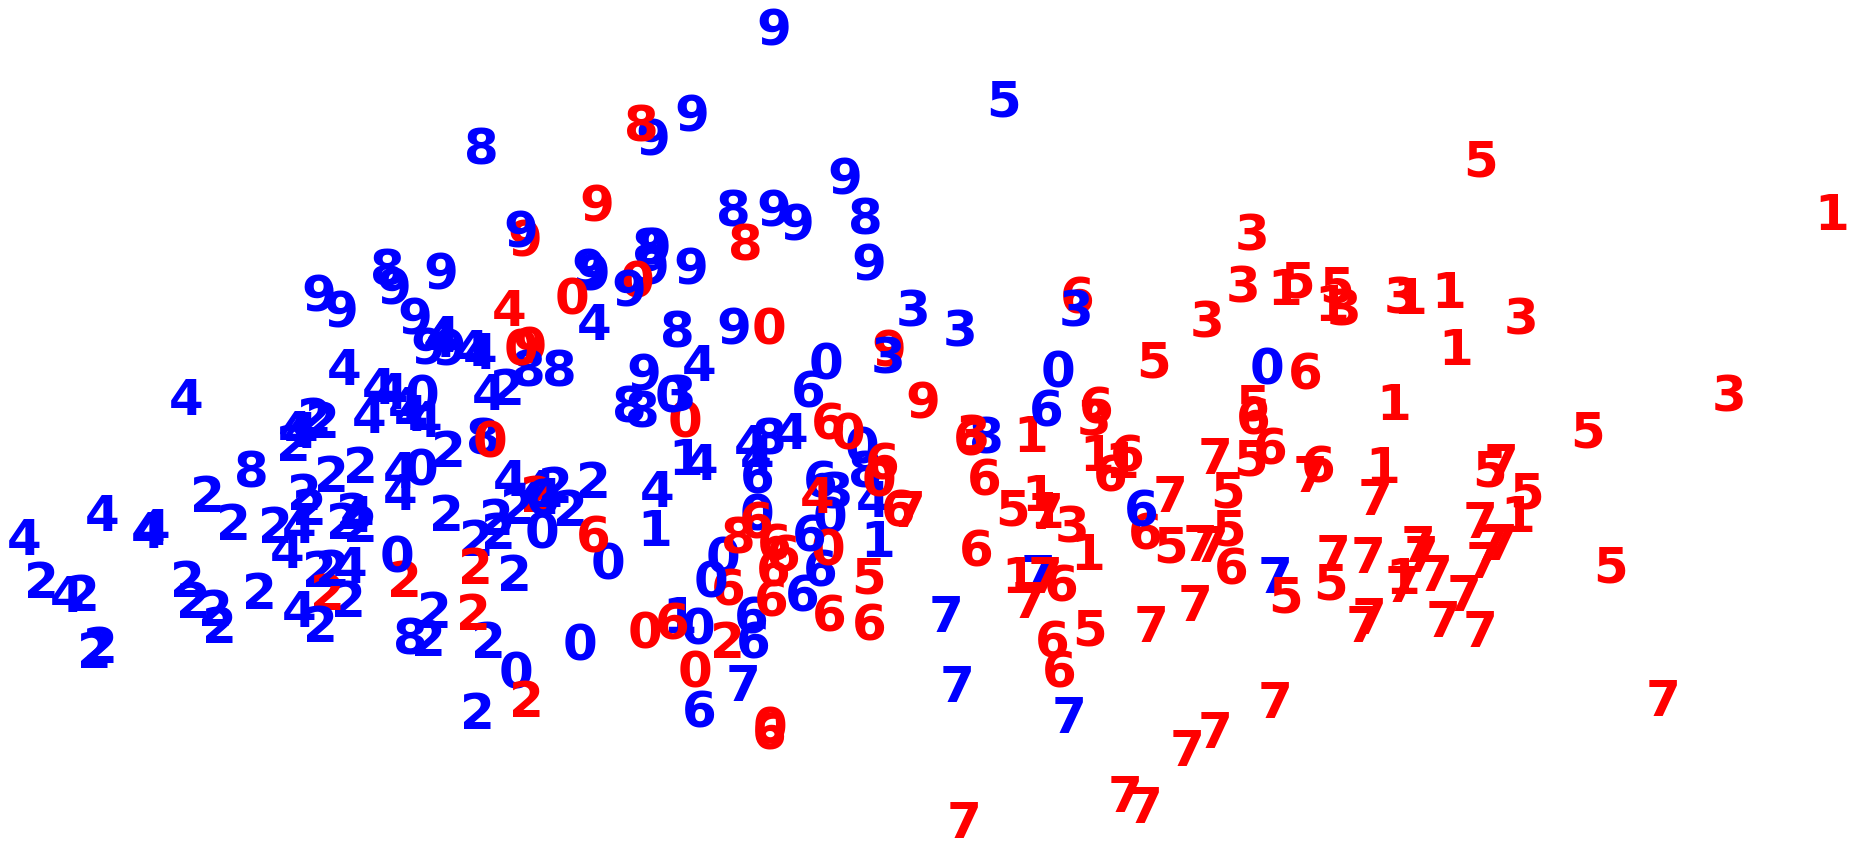

col_0   0   1
row_0        
0      12  18
1      17   4
2       7  41
3      10   6
4       2  38
5      18   1
6      30  11
7      35   6
8       3  16
9       5  23


In [56]:
# Defining the k-means
kmeans_cluster_10 = KMeans(n_clusters=10, random_state=123)

# Fit model
%timeit kmeans_cluster_10.fit(X_std)
y_pred = kmeans_cluster_10.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(4, 2))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print(pd.crosstab(y_pred, y))

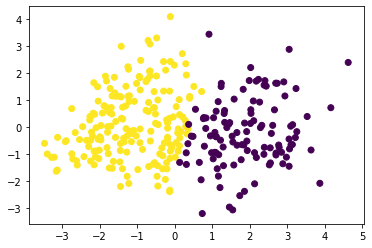

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      101   13
1       38  151


In [52]:
# Standardize the data.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Reduce it to two components for visualization
X_pca = PCA(2).fit_transform(X_std)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))